# Analisis Exploratorio

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('vehiculos_train.csv')

In [16]:
df.head()

,marca,modelo,color,anio_registro,tipo_vehiculo,millas_recorridas,tamanio_motor,transmision,tipo_combustible,precio_vehiculo,num_asientos,num_puertas,problema_averia,id_problema_averia,fecha_averia,complejidad_reparacion,costo_reparacion,horas_reparacion,fecha_reparacion,fraude
0,Jeep,Renegade,Black,2018.0,SUV,17.0,1.4L,Manual,Petrol,16000.0,5.0,5.0,Electrical Issue,5,2018-06-07,1,76.0000,3.0,2018-06-07,0
1,Vauxhall,Insignia,Grey,2011.0,Hatchback,93000.0,NaN,Manual,Petrol,3995.0,5.0,5.0,Excessive Emissions,0,2018-08-09,1,23.5955,1.0,2018-08-09,0
2,Mercedes-Benz,GLC Class,White,2019.0,SUV,6879.0,2.0L,Automatic,Diesel,31498.0,5.0,5.0,Windscreen Crack,0,2021-06-17,1,38.8988,1.0,2021-06-17,0
3,Renault,NaN,NaN,2014.0,Hatchback,20669.0,1.2L,Manual,Petrol,6950.0,5.0,5.0,Brake Pads Worn,0,2018-04-23,1,43.4750,2.0,2018-04-23,0
4,Ford,C-Max,NaN,2007.0,MPV,84786.0,1.6L,Manual,Petrol,NaN,5.0,5.0,Tyre Alignment,0,2018-05-20,1,10.2600,0.5,2018-05-20,0


# Tarea 2

<Axes: xlabel='transmision'>

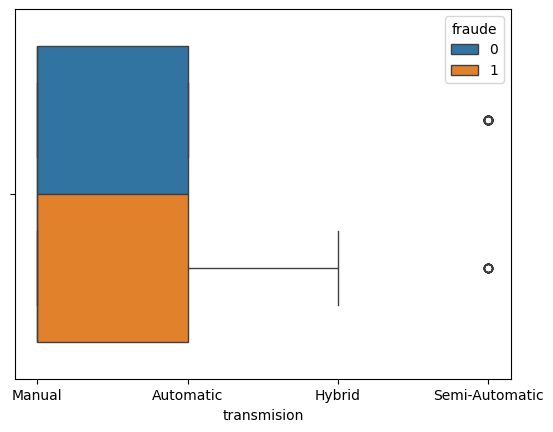

In [20]:
sns.boxplot(x='transmision', hue='fraude', data=df)

<Axes: xlabel='costo_reparacion'>

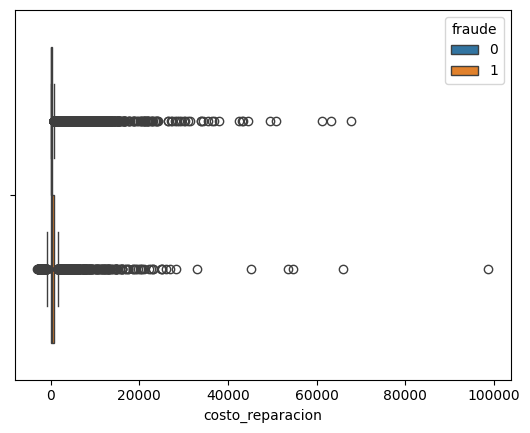

In [21]:
sns.boxplot(x='costo_reparacion', hue='fraude', data=df)

<Axes: xlabel='costo_reparacion', ylabel='Count'>

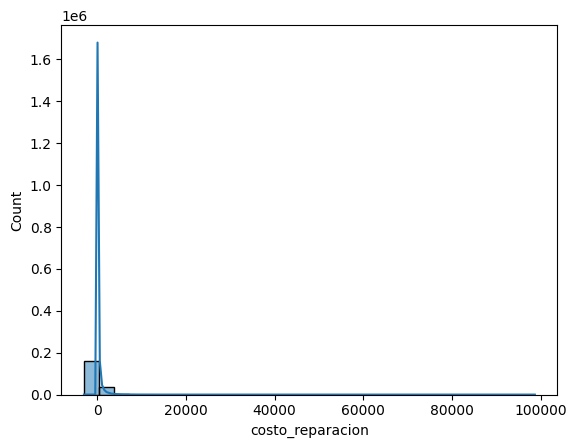

In [24]:
sns.histplot(data=df, x='costo_reparacion', kde=True, bins=30)